In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load dataset
df = pd.read_csv('dataset.csv', index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
#Number of reviews for each clothing ID
df.groupby('Clothing ID').size().sort_values(ascending=False)

Clothing ID
1078    1024
862      806
1094     756
1081     582
872      545
829      527
1110     480
868      430
895      404
936      358
867      351
850      338
1095     327
863      306
1077     297
1059     294
1086     291
1080     289
860      288
1083     249
861      244
873      238
828      225
1092     220
1033     220
927      214
1056     213
820      211
1022     205
836      205
        ... 
347        1
348        1
349        1
754        1
351        1
352        1
353        1
354        1
355        1
356        1
358        1
359        1
751        1
750        1
748        1
747        1
746        1
366        1
367        1
744        1
369        1
743        1
371        1
372        1
373        1
740        1
738        1
379        1
735        1
0          1
Length: 1206, dtype: int64

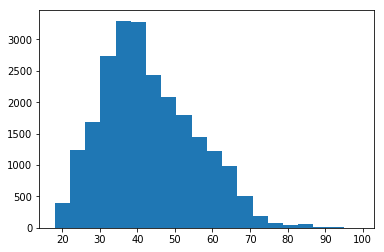

In [4]:
#Age distribution
plt.hist(df.Age, bins=20)
plt.show()

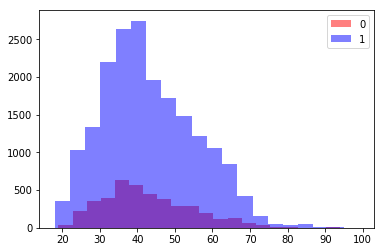

In [5]:
#Age Distributions for positive and negative reviews
colors = ['red','blue']

plt.hist(df[df['Recommended IND']==0].Age, bins=20, color='red', alpha=0.5, label='0')
plt.hist(df[df['Recommended IND']==1].Age, bins=20, color='blue', alpha=0.5, label='1')
plt.legend()
plt.show()

In [6]:
#Most common words
pd.Series(' '.join(df['Review Text'].dropna()).lower().split()).value_counts()

the                75768
i                  58386
and                48513
a                  42725
it                 37429
is                 30328
this               25041
to                 24323
in                 20250
but                16116
for                13719
on                 13702
of                 13363
with               12657
was                12135
so                 11639
my                 10918
not                 9362
that                9137
love                8401
very                8125
have                7926
dress               7807
are                 7198
be                  6847
size                6789
like                6755
as                  6618
it's                6275
wear                5900
                   ...  
cutis                  1
(won't                 1
hips/busts)            1
casula                 1
guffawed               1
laidback.              1
explained              1
trip,                  1
part/                  1


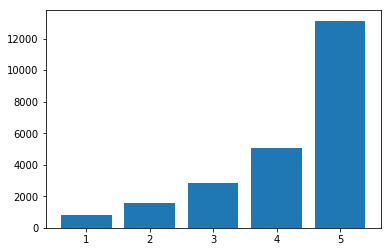

In [7]:
#Number of reviews for each rating 
category_counts = df.groupby('Rating').size()
plt.bar(category_counts.index, category_counts)
plt.show()

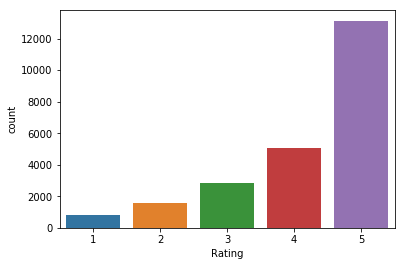

In [8]:
#Number of reviews for each rating 
import seaborn as sns

sns.countplot(x = 'Rating', data = df)
plt.show()

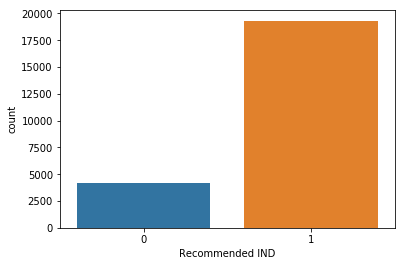

In [9]:
#Number of reviews for each recommended class 
import seaborn as sns

sns.countplot(x = 'Recommended IND', data = df)
plt.show()

In [10]:
np.mean(df['Recommended IND'])

0.8223622583666865

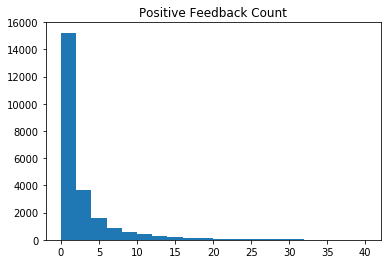

In [11]:
#Distribution of feedback counts
plt.hist(df['Positive Feedback Count'], bins=20, range=[0,40])
plt.title('Positive Feedback Count')
plt.show()

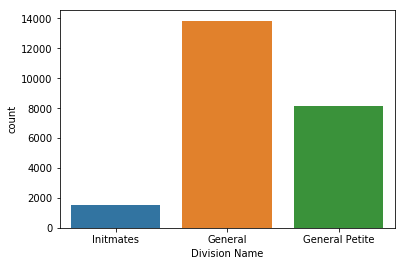

In [12]:
#Number of reviews for each division name
sns.countplot(df['Division Name'])
plt.show()

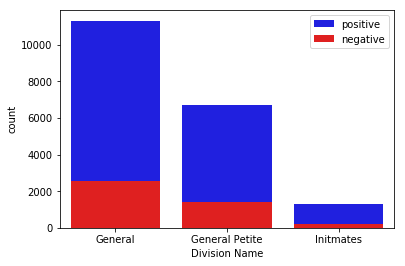

In [13]:
#Number of reviews for each division name with each class
sns.countplot(df[df['Recommended IND']==1]['Division Name'].sort_values(), color='blue', label='positive')
sns.countplot(df[df['Recommended IND']==0]['Division Name'].sort_values(), color='red', label='negative')
plt.legend()
plt.show()

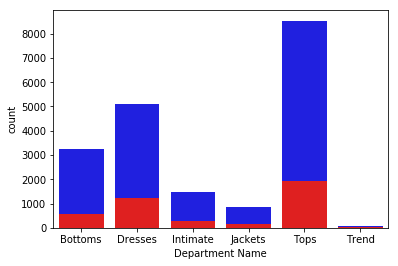

In [14]:
#Number of reviews for each department name with each class
sns.countplot(df[df['Recommended IND']==1]['Department Name'].sort_values(), color='blue')
sns.countplot(df[df['Recommended IND']==0]['Department Name'].sort_values(), color='red')
plt.show()

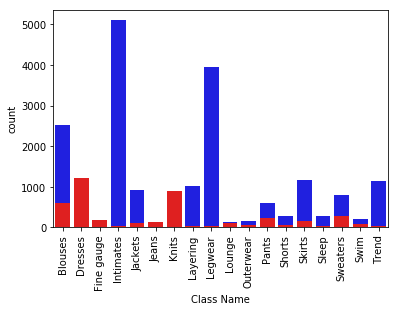

In [15]:
#Number of reviews for each class name with each class
#Note: I realized later on that there are no values for some of the columns for the reviews where 'Recommended IND' = 0.
#This changed the locations of many of the bars for the negative reviews, so don't take this figure seriously. 
sns.countplot(df[df['Recommended IND']==1]['Class Name'].sort_values(), color='blue')
sns.countplot(df[df['Recommended IND']==0]['Class Name'].sort_values(), color='red')
plt.xticks(rotation=90)
plt.show()

In [16]:
print(sorted(df[df['Recommended IND']==1]['Class Name'].dropna().unique()))
print(sorted(df[df['Recommended IND']==0]['Class Name'].dropna().unique()))

['Blouses', 'Casual bottoms', 'Chemises', 'Dresses', 'Fine gauge', 'Intimates', 'Jackets', 'Jeans', 'Knits', 'Layering', 'Legwear', 'Lounge', 'Outerwear', 'Pants', 'Shorts', 'Skirts', 'Sleep', 'Sweaters', 'Swim', 'Trend']
['Blouses', 'Dresses', 'Fine gauge', 'Intimates', 'Jackets', 'Jeans', 'Knits', 'Layering', 'Legwear', 'Lounge', 'Outerwear', 'Pants', 'Shorts', 'Skirts', 'Sleep', 'Sweaters', 'Swim', 'Trend']


In [17]:
#Length of each text review
def length(s):
#     return len(s.split())
    if type(s) == str:
        return len(s.split())
    else:
        return None 
    
df['Review Length'] = df['Review Text'].apply(length)

/Users/aselzler3/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/aselzler3/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


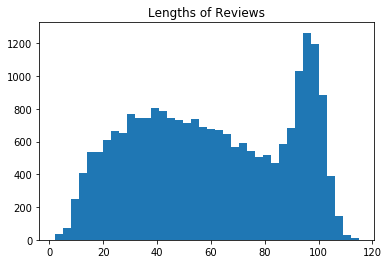

In [18]:
#Distribution of review lengths
plt.hist(df['Review Length'], bins=38)
plt.title('Lengths of Reviews')
plt.show()

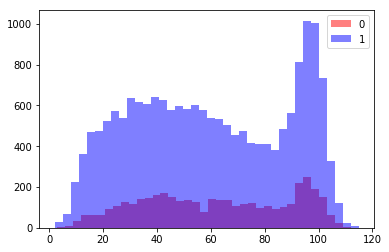

In [19]:
#Distribution of review lengths for each recommended class
plt.hist(df[df['Recommended IND']==0]['Review Length'], bins=38, color='red', alpha=0.5, label=str(0))
plt.hist(df[df['Recommended IND']==1]['Review Length'], bins=38, color='blue', alpha=0.5, label=str(1))
plt.legend()
plt.show()

In [20]:
import nltk
from textblob import TextBlob
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/aselzler3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
s = "Made me look top heavy"
[TextBlob(x).sentiment.polarity for x in TextBlob(s).words]
# TextBlob(s).sentiment.polarity

[0.0, 0.0, 0.0, 0.5, -0.2]

In [22]:
#sentiment polarity of each review
def polarity(s):
    if type(s) == str:
        return TextBlob(s).sentiment.polarity 
    else:
        return None 
    
df['review polarity'] = df['Review Text'].apply(polarity)

/Users/aselzler3/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/aselzler3/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


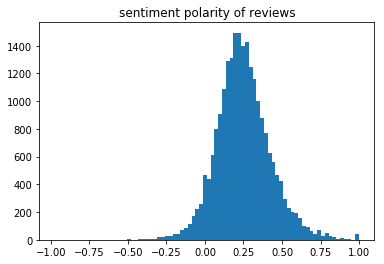

In [23]:
#Distribution of sentiment polarities
plt.hist(df['review polarity'], bins=80)
plt.title('sentiment polarity of reviews')
plt.show()

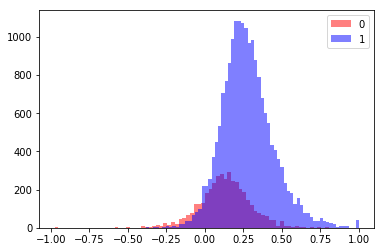

In [24]:
#Distribution of sentiment polarities for each recommended class 
plt.hist(df[df['Recommended IND']==0]['review polarity'], bins=80, color='red', alpha=0.5, label='0')
plt.hist(df[df['Recommended IND']==1]['review polarity'], bins=80, color='blue', alpha=0.5, label='1')
plt.legend()
plt.show()